from https://github.com/E-Dmz/slicereg/blob/main/notebooks/atlas_coords.ipynb
```python
import bg_atlasapi as bg
atlas = bg.BrainGlobeAtlas("allen_mouse_100um")
```
downloads to `.brainglobe` folder

In [1]:
import os
import numpy as np 


import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import SimpleITK as sitk

In [22]:
FOLDER = '/home/etienne.doumazane/.brainglobe/allen_mouse_100um_v1.2/'

In [23]:
os.listdir(FOLDER)

['structures.json',
 'structures.csv',
 'reference.tiff',
 'annotation.tiff',
 'README.txt',
 'metadata.json',
 'meshes']

## Reference

In [24]:
fname = os.path.join(FOLDER, 'reference.tiff')
itk_image = sitk.ReadImage(fname)
array = sitk.GetArrayFromImage(itk_image)

In [25]:
array.shape

(132, 80, 114)

0.05526731127060074
0.0


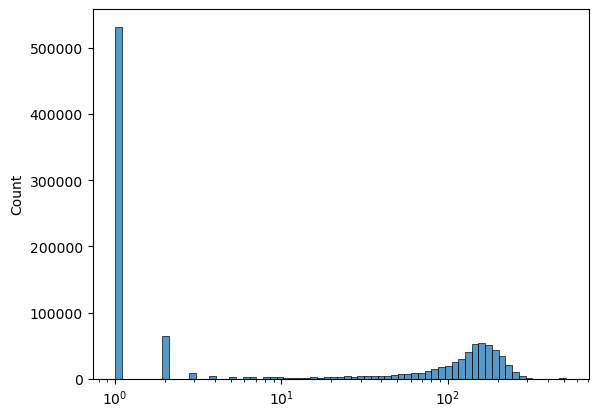

In [26]:
print((array == 0).mean())
print((array < 0).mean())

sns.histplot(array[array>0].flatten(), log_scale=True);

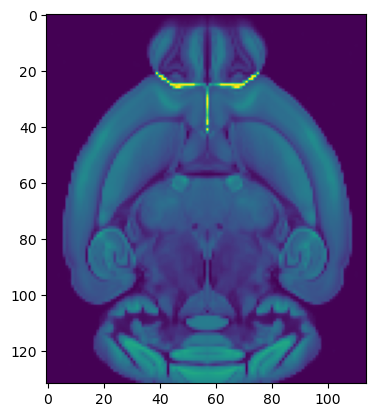

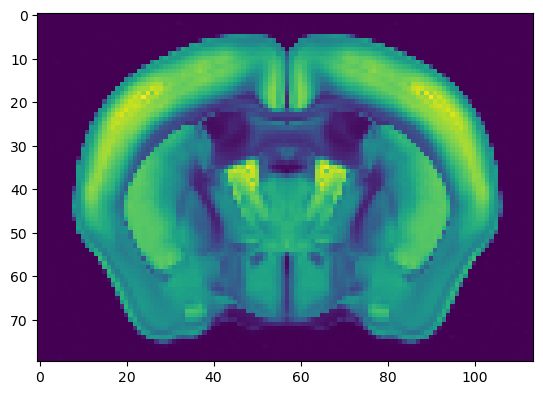

In [27]:
plt.imshow(array[:,40,:])
plt.show()
plt.imshow(array[60,:,:])
plt.show()

## Annotation

In [81]:
fname = os.path.join(FOLDER, 'annotation.tiff')
itk_image = sitk.ReadImage(fname, )
array = sitk.GetArrayFromImage(itk_image)

In [82]:
array.shape

(132, 80, 114)

In [83]:
array.dtype

dtype('uint32')

0.0
0.0


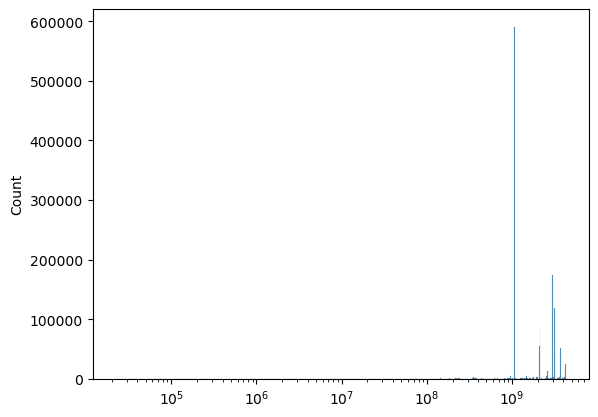

In [87]:
print((array == 0).mean())
print((array < 0).mean())

sns.histplot(array[array>0].flatten(), log_scale=True);

In [94]:
import time
for _ in range(10):
    array_2 = array
    itk_image = sitk.ReadImage(fname)
    array = sitk.GetArrayFromImage(itk_image)
    time.sleep(1)
    print((array != array_2).sum())

0
0
0
0
0
0
0
0
0
0


6
6
2
4
1
5
1202009
1201940
3
3


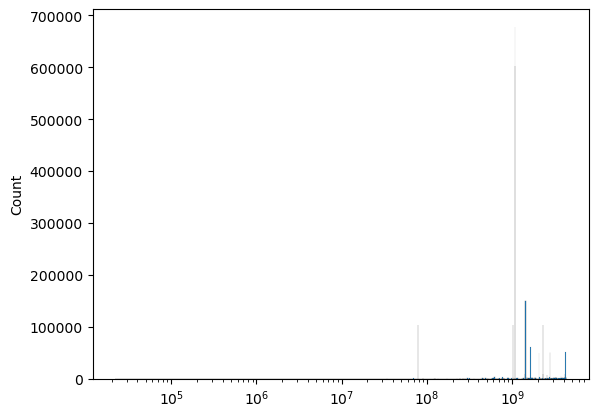

In [92]:
for _ in range(10):
    array_2 = array
    sns.histplot(array[array>0].flatten(), log_scale=True);
    itk_image = sitk.ReadImage(fname)
    array = sitk.GetArrayFromImage(itk_image)
    time.sleep(1)
    print((array != array_2).sum())

In [32]:
ids, counts = np.unique(array, return_counts=True)
df_counts = pd.DataFrame(dict(atlas_id=ids, count=counts)).set_index("atlas_id").sort_values(by="count", ascending=False)
df_counts

,count
atlas_id,
0,361597
1132396544,173096
1075977125,86535
2989353846,86535
4283695428,58672
...,...
173121,1
1273866937,1
3532172633,1


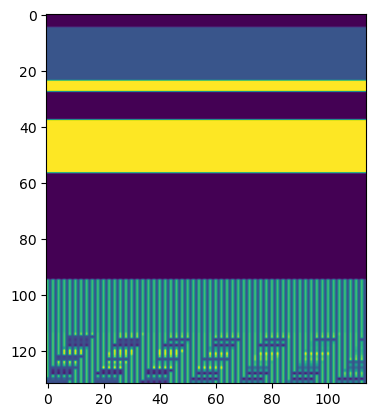

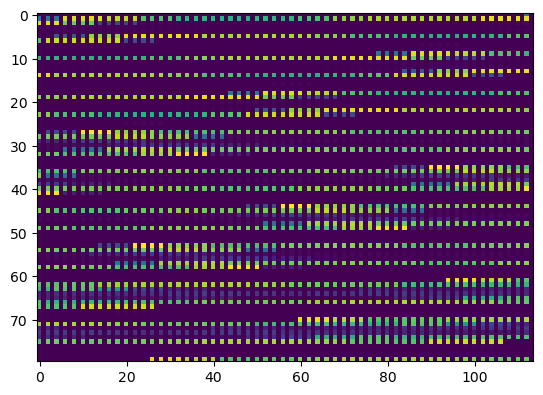

In [33]:
plt.imshow(array[:,40,:])
plt.show()
plt.imshow(array[60,:,:])
plt.show()